In [293]:
!pip install -r requirements.txt

In [294]:
import random

import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [295]:
m = 1000000
a_values = [random.randint(0, 1) for x in range(m)]
b_values = [random.randint(0, 1) for x in range(m)]

In [296]:
X = pd.DataFrame({ 'a': a_values, 'b': b_values})
X.head()

,a,b
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0


In [297]:
X.shape

(1000000, 2)

In [298]:
def logical_or(row):
    return row['a'] or row['b']

In [299]:
y_values = X.apply(lambda row: logical_or(row), axis=1)
y = pd.DataFrame({ 'y': y_values })
y.head()

,y
0,0
1,0
2,1
3,0
4,0


In [300]:
size_val_set = min(int(m * 0.2), 20000)
size_test_set = min(int(m * 0.2), 20000)
end_test_set = size_val_set + size_test_set

X_val = X[0:size_val_set]
y_val = y[0:size_val_set]
X_test = X[size_val_set:end_test_set]
y_test = y[size_val_set:end_test_set]
X_train = X[end_test_set:]
y_train = y[end_test_set:]

print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

sum_rows = X_train.shape[0] + X_val.shape[0] + X_test.shape[0]
print(X_train.shape[0] + X_val.shape[0] + X_test.shape[0])
print(X.shape[0])
print(f"We have {X.shape[0]} rows in X. We have {sum_rows} in all sub-matrices combined (which should be the same).")
assert(sum_rows == X.shape[0])

(960000, 2)
(20000, 2)
(20000, 2)
(960000, 1)
(20000, 1)
(20000, 1)
1000000
1000000
We have 1000000 rows in X. We have 1000000 in all sub-matrices combined (which should be the same).


In [301]:
from tensorflow.keras.layers import Dense

model = tf.keras.models.Sequential()

model.add(Dense(units=4, activation='relu', input_dim=X.shape[1]))
# model.add(Dense(units=4, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

In [302]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [303]:
history = model.fit(X_train, y_train, batch_size=512, epochs=3, validation_data=(X_val, y_val))

Train on 960000 samples, validate on 20000 samples
Epoch 1/3
960000/960000 [==============================] - 2s 2us/sample - loss: 0.2724 - accuracy: 0.8600 - val_loss: 0.1023 - val_accuracy: 1.0000
Epoch 2/3
960000/960000 [==============================] - 2s 2us/sample - loss: 0.0555 - accuracy: 1.0000 - val_loss: 0.0289 - val_accuracy: 1.0000
Epoch 3/3
960000/960000 [==============================] - 2s 2us/sample - loss: 0.0181 - accuracy: 1.0000 - val_loss: 0.0110 - val_accuracy: 1.0000


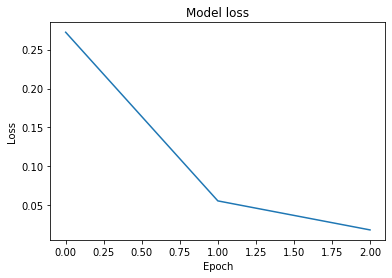

In [304]:
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

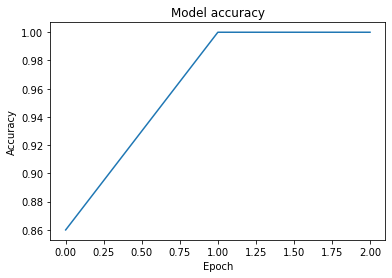

In [305]:
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

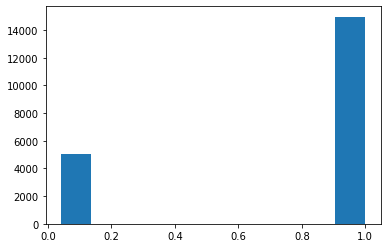

In [306]:
y_pred = model.predict(X_val)
plt.hist(y_pred)
plt.show()

In [312]:
def test_prediction(a, b):
    values = { 'a': a, 'b': b }
    print(f"(a, b) = ({values['a']}, {values['b']}), solution: {logical_or(values)}")
    prediction = model.predict([(values['a'], values['b'])])
    print(f"Prediction: {prediction}")
    print('---')
test_prediction(0, 0)
test_prediction(0, 1)
test_prediction(1, 0)
test_prediction(1, 1)
print("\nFor fun:")
test_prediction(0.8, 0.2)
test_prediction(0.2, 0.2)

(a, b) = (0, 0), solution: 0
Prediction: [[0.04079256]]
---
(a, b) = (0, 1), solution: 1
Prediction: [[0.99957997]]
---
(a, b) = (1, 0), solution: 1
Prediction: [[0.9985234]]
---
(a, b) = (1, 1), solution: 1
Prediction: [[1.]]
---

For fun:
(a, b) = (0.8, 0.2), solution: 0.8
Prediction: [[0.9987865]]
---
(a, b) = (0.2, 0.2), solution: 0.2
Prediction: [[0.72051895]]
---
